<a href="https://colab.research.google.com/github/avicennamumtaza/courses-machinelearning/blob/main/jobsheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

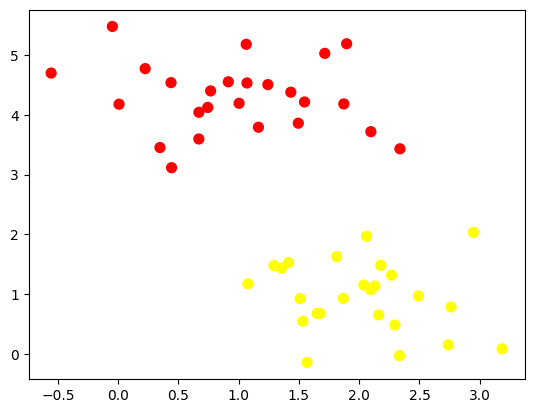

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

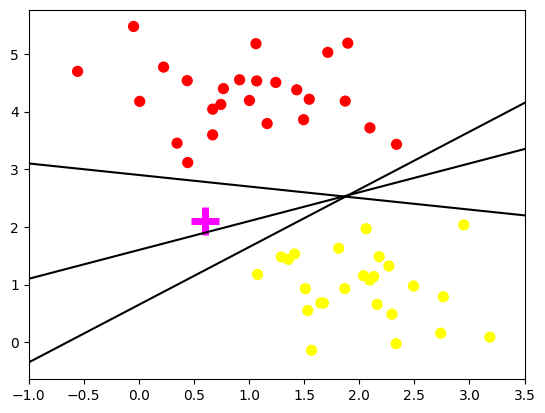

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], '+', color='magenta', markeredgewidth=5, markersize=20)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    # print(m * xfit + b)
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

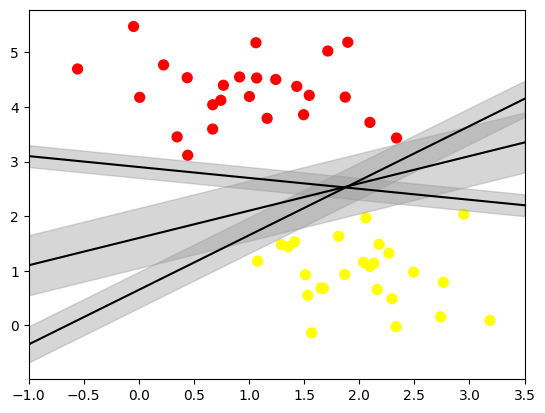

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#999999', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

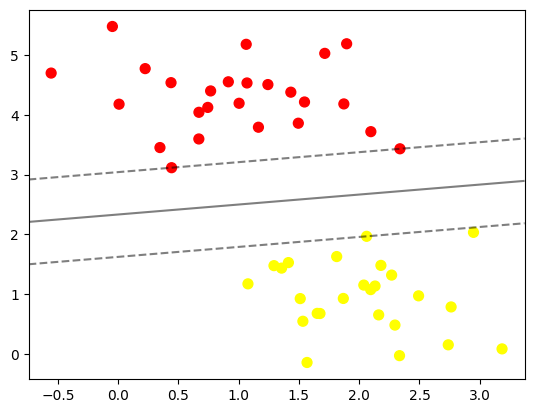

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

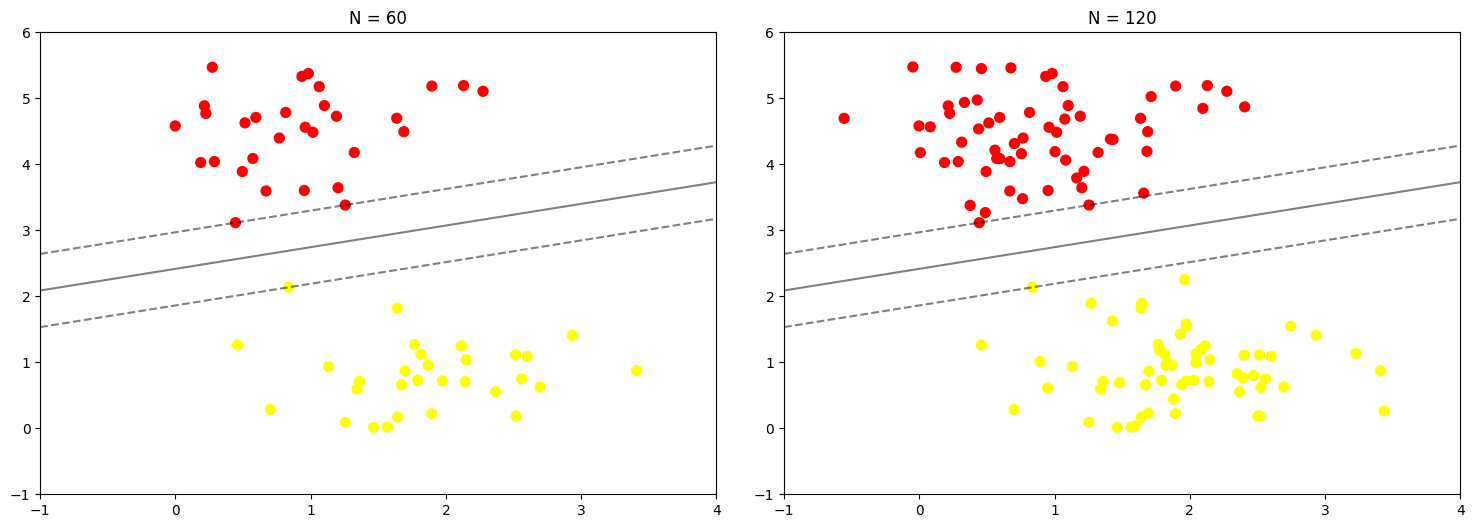

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# print(fig, ax)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

[ 0.2370799  -0.0241094   0.23013931 -0.06307578 -0.04579255  0.05279312
 -0.02972649  0.05106497 -0.38671447 -1.06907006 -0.03643322  0.02624038
 -0.14844675 -1.07167815 -0.89290088  0.41113164 -0.50223861 -0.03393746
 -0.67839093 -0.14603125 -0.17107608 -1.10112362  0.93140087  0.19269619
  0.0290726  -0.15858351  0.06854024 -0.01632832  0.03332256 -0.17079111
  0.55815162  0.9977659  -0.06728916  0.14359879 -0.25703683  0.80832636
 -0.1450421  -0.18402828 -0.18081365  0.91254291  0.02373581 -0.20165144
  0.00708932  0.20202022 -0.06784741 -0.93874186 -0.08929081  0.98645297
  0.90271367 -1.13269312 -0.76801992  0.09915781  0.3069994  -0.01847771
  0.21383478  0.71789641  0.99876878 -0.79854788 -0.79819875  1.00176041
  0.044564    0.15073762 -1.01777873 -0.14071437 -0.4901655  -0.15122375
  0.88875383 -0.27531326 -0.07227464 -0.46534975  0.22032264 -1.00447732
 -0.10249855  0.25641412 -0.03776469  0.51179018  0.1486237   0.26068187
 -0.19855134 -0.95695802  0.61965329 -0.53072044  0

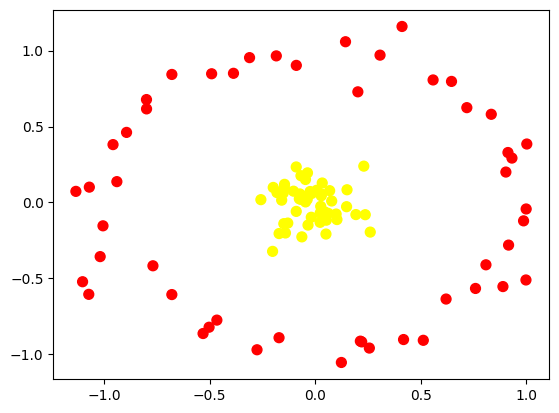

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
print(X[:, 0],X[:, 1],y)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# plot_svc_decision_function(clf, plot_support=False);

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.2370799 , -0.08102054],
       [-0.0241094 ,  0.0717094 ],
       [ 0.23013931,  0.23900463],
       [-0.06307578, -0.22711941],
       [-0.04579255,  0.15098617],
       [ 0.05279312, -0.11704862],
       [-0.02972649,  0.05125226],
       [ 0.05106497, -0.20848369],
       [-0.38671447,  0.85085062],
       [-1.06907006,  0.10055893],
       [-0.03643322,  0.19473294],
       [ 0.02624038, -0.02600631],
       [-0.14844675, -0.14013727],
       [-1.07167815, -0.60588926],
       [-0.89290088,  0.46142105],
       [ 0.41113164,  1.15948607],
       [-0.50223861, -0.82258143],
       [-0.03393746, -0.14937223],
       [-0.67839093,  0.84328809],
       [-0.14603125,  0.09783207],
       [-0.17107608, -0.89169719],
       [-1.10112362, -0.52278046],
       [ 0.93140087,  0.29217963],
       [ 0.19269619, -0.08020091],
       [ 0.0290726 ,  0.05538092],
       [-0.15858351,  0.014923  ],
       [ 0.06854024,  0.07726939],
       [-0.01632832,  0.05912628],
       [ 0.03332256,  0.12782412],
       [-0.17079111, -0.20525897],
       [ 0.55815162,  0.80709126],
       [ 0.9977659 , -0.51118149],
       [-0.06728916,  0.17594114],
       [ 0.14359879,  1.05891941],
       [-0.25703683,  0.01805638],
       [ 0.80832636, -0.41121736],
       [-0.1450421 ,  0.11909928],
       [-0.18402828,  0.96568935],
       [-0.18081365,  0.064902  ],
       [ 0.91254291,  0.32876765],
       [ 0.02373581, -0.07012687],
       [-0.20165144, -0.32271625],
       [ 0.00708932,  0.07989807],
       [ 0.20202022,  0.72877664],
       [-0.06784741,  0.02017163],
       [-0.93874186,  0.13688989],
       [-0.08929081,  0.90314246],
       [ 0.98645297, -0.12156696],
       [ 0.90271367,  0.20005091],
       [-1.13269312,  0.07273562],
       [-0.76801992, -0.41770481],
       [ 0.09915781, -0.07666868],
       [ 0.3069994 ,  0.97056928],
       [-0.01847771, -0.09789933],
       [ 0.21383478, -0.91444395],
       [ 0.71789641,  0.62452766],
       [ 0.99876878, -0.04328054],
       [-0.79854788,  0.67779409],
       [-0.79819875,  0.61635592],
       [ 1.00176041,  0.3848546 ],
       [ 0.044564  , -0.06225942],
       [ 0.15073762,  0.08334797],
       [-1.01777873, -0.35726842],
       [-0.14071437, -0.2013878 ],
       [-0.4901655 ,  0.8478193 ],
       [-0.15122375,  0.06173224],
       [ 0.88875383, -0.55468847],
       [-0.27531326, -0.9711723 ],
       [-0.07227464,  0.05564461],
       [-0.46534975, -0.77574067],
       [ 0.22032264, -0.9192113 ],
       [-1.00447732, -0.15429801],
       [-0.10249855,  0.07395319],
       [ 0.25641412, -0.95997293],
       [-0.03776469,  0.01958943],
       [ 0.51179018, -0.90882037],
       [ 0.1486237 , -0.02825848],
       [ 0.26068187, -0.19558579],
       [-0.19855134,  0.09861488],
       [-0.95695802,  0.38096282],
       [ 0.61965329, -0.63686203],
       [-0.53072044, -0.86406685],
       [ 0.0232641 , -0.13122204],
       [ 0.64536965,  0.79741417],
       [ 0.12400694, -1.05494586],
       [ 0.915463  , -0.28132386],
       [-0.0750616 ,  0.02413723],
       [ 0.06197101, -0.072408  ],
       [ 0.83350883,  0.58072995],
       [-0.04558457,  0.00323363],
       [ 0.02877811,  0.04381007],
       [ 0.75894931, -0.56707524],
       [ 0.41833491, -0.90377108],
       [ 0.10306702, -0.11298902],
       [-0.31060553,  0.9541754 ],
       [-0.08967425, -0.05923024],
       [-0.08974468,  0.23361236],
       [-0.12974106, -0.13624971],
       [-0.67851229, -0.60739101],
       [ 0.07822735,  0.00932417]]), y=array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]))>

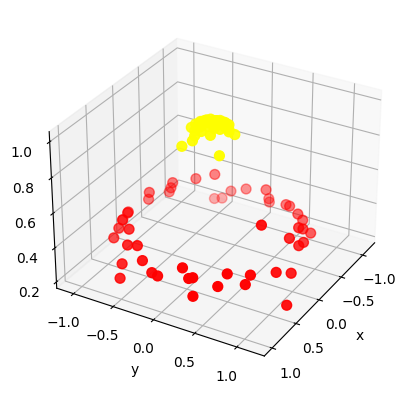

In [ ]:
r = np.exp(-(X ** 2).sum(1))
# print(r)
from ipywidgets import interact, fixed, interactive, Dropdown
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [ ]:
# widget = interactive(plot_3D,
#                      elev=Dropdown(description='elev', options=[-90, 45, 30, 20, 10], value=30),
#                      azim=(-180, 180),
#                      X=fixed(X),
#                      Y=fixed(Y),
#                      R=fixed(R))

# widget

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

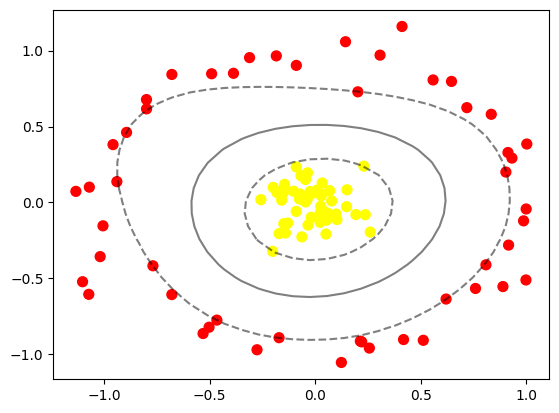

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
#             s=300, lw=1, facecolors='none')

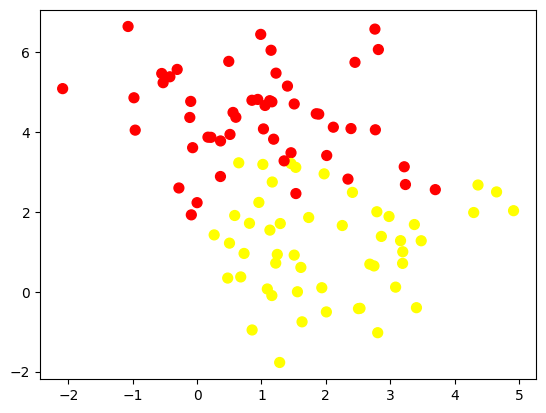

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

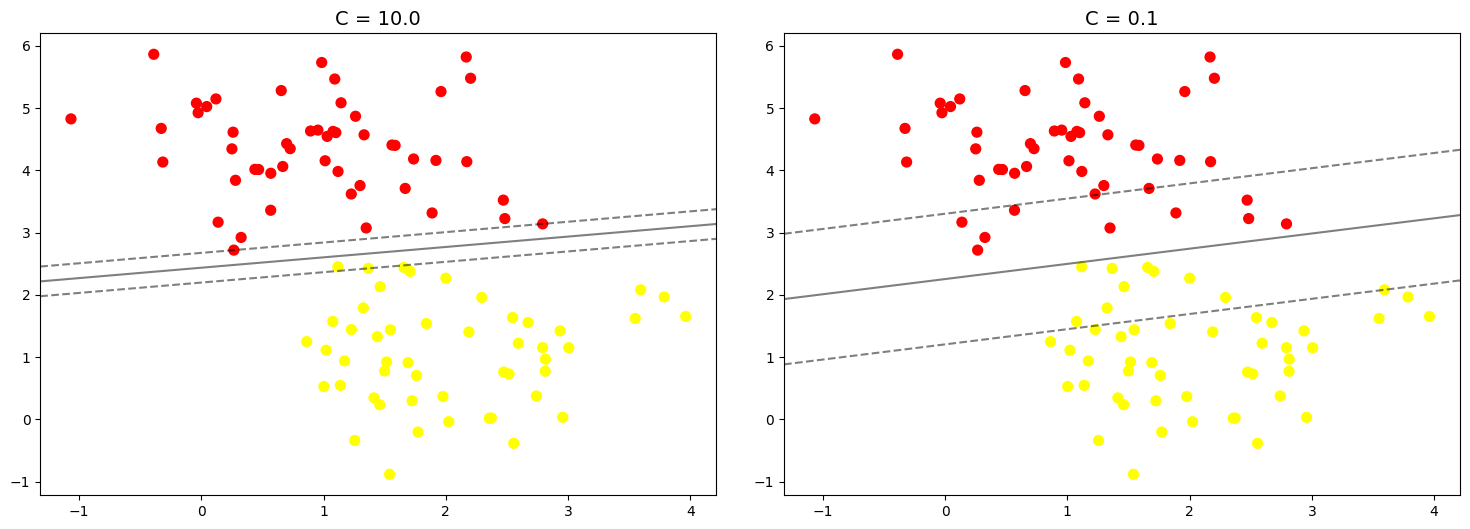

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# print(fig)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Praktikum 2

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


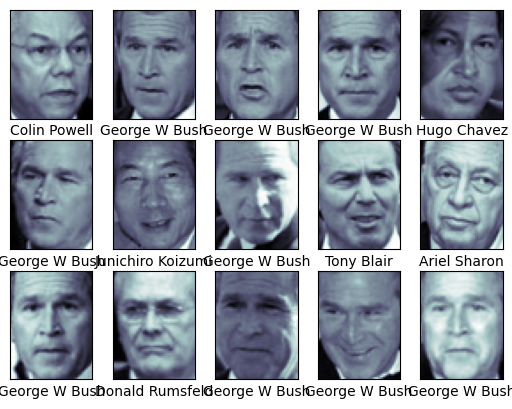

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 36s, sys: 25.8 s, total: 2min 2s
Wall time: 1min 16s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

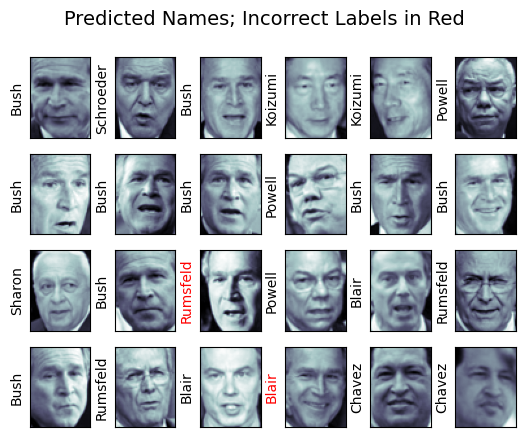

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

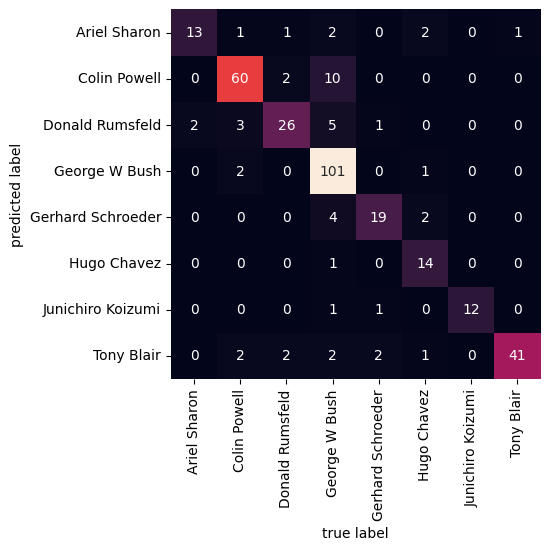

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Praktikum 3

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[127  14]
 [137 192]
 [ 47 118]
 [148 120]
 [143 103]
 [131 161]
 [111 130]
 [120  25]
 [ 59 268]
 [ 61 180]
 [ 66  91]
 [ 98 164]
 [ 63 146]
 [264   4]
 [ 28 188]
 [162  16]
 [ 52  24]
 [ 32  27]
 [132 133]
 [ 35   5]
 [ 79 144]
 [144 217]
 [142 160]
 [ 95  28]
 [ 87 185]
 [109 120]
 [ 93  54]
 [ 99  84]
 [102 135]
 [ 97  69]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,127,14,0
1,137,192,0
2,47,118,0
3,148,120,0
4,143,103,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,127,14,Kelas B
1,137,192,Kelas B
2,47,118,Kelas B
3,148,120,Kelas B
4,143,103,Kelas B


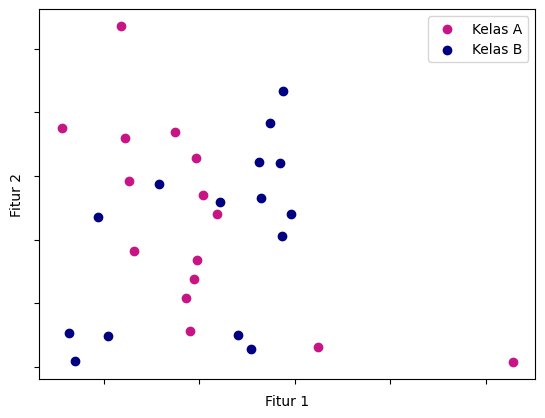

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6666666666666666
Hasil akurasi data test: 0.3333333333333333


In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.2222222222222222


# Praktikum 4

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
# /content/drive/MyDrive/PCVK/belajar

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Jobsheet4/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['SMS'].values
y = df['Labels'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# Praktikum 5

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

# Image directories
train_dir = "/content/drive/MyDrive/MachineLearning/Jobsheet4/images/training/"
test_dir = "/content/drive/MyDrive/MachineLearning/Jobsheet4/images/test/"

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[3, 4, 8],
         [4, 5, 9],
         [4, 5, 9],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[2, 3, 7],
         [3, 4, 8],
         [3, 4, 8],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 2, 4],
         [2, 3, 5],
         [3, 4, 6],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        ...,
 
        [[2, 4, 3],
         [3, 5, 4],
         [4, 6, 5],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 3, 2],
         [2, 4, 3],
         [3, 5, 4],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 2, 1],
         [1, 3, 2],
         [2, 4, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'night')

In [ ]:
# Check if train_img is not empty
if len(train_img) > 0:
    # Random size checking
    pick_random = np.random.randint(0, len(train_img))

    # Check img size
    print(f'Image {pick_random}')
else:
    print('train_img is empty!')

Image 1


In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (889, 1280, 3)
Label	: day


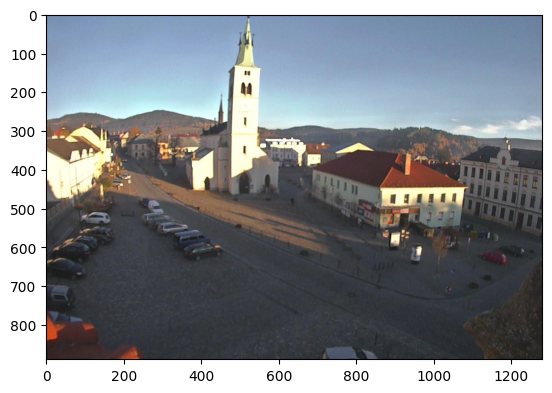

In [ ]:
random_img_viz(train_img)

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 194
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


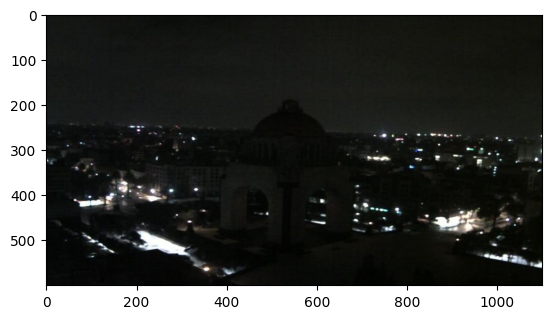

In [ ]:
random_img_viz(train_std_img_list)

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 59
Avg Brighness: 29.4253


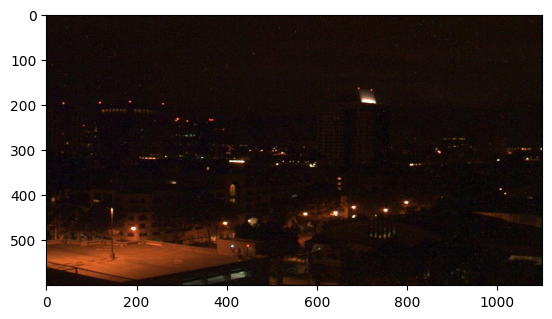

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 49
Actual label: 0
Predicted label: 0


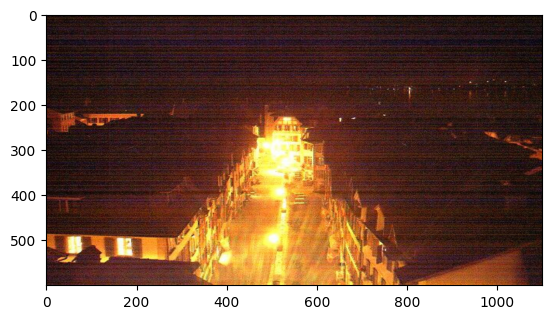

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head(20)

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,35.963767,0.0
1,93.118320,0.0
2,38.835795,0.0
3,99.623588,0.0
4,85.889741,0.0
5,101.579750,0.0
6,71.988076,0.0
7,48.713038,0.0
8,25.805306,0.0
9,96.859232,0.0


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head(20)

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,22.356079,0.0
1,73.073691,0.0
2,54.137088,0.0
3,86.269774,0.0
4,13.708703,0.0
5,51.373026,0.0
6,14.008245,0.0
7,46.693686,0.0
8,12.978200,0.0
9,36.772694,0.0


In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


In [ ]:
# import numpy as np
# import cv2  # Pastikan OpenCV sudah terinstal

# # Fungsi untuk menghitung histogram dari gambar
# def calc_histogram(image, bins=256):
#     # Menghitung histogram pada saluran warna (misalnya, Grayscale)
#     hist = cv2.calcHist([image], [0], None, [bins], [0, 256])
#     # Meratakan histogram agar berbentuk vektor 1D
#     hist = hist.flatten()
#     return hist

# # Contoh jika gambar berada dalam list atau array
# X_train_hist = np.array([calc_histogram(img) for img in X_train])
# X_test_hist = np.array([calc_histogram(img) for img in X_test])

# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Inisialisasi model SVM
# model = SVC()

# # Melatih model dengan fitur histogram
# model.fit(X_train_hist, y_train)

# # Prediksi pada data latih
# y_train_pred = model.predict(X_train_hist)
# acc_train = accuracy_score(y_train, y_train_pred)

# # Prediksi pada data uji
# y_test_pred = model.predict(X_test_hist)
# acc_test = accuracy_score(y_test, y_test_pred)

# # Menampilkan hasil akurasi
# print(f'Accuracy on train: {acc_train}')
# print(f'Accuracy on test: {acc_test}')
# print(type(X_train[0]), X_train[0].shape)

In [ ]:
import numpy as np
import cv2

# Fungsi untuk menghitung histogram dari gambar
def calc_histogram(image, bins=256):
    # Pastikan gambar adalah numpy array dan bertipe uint8 atau float32
    if not isinstance(image, np.ndarray):
        raise ValueError(f"Image must be a numpy array, but got {type(image)}")

    # Konversi ke uint8 jika perlu
    if image.dtype != 'uint8':
        image = image.astype('uint8')

    # Menghitung histogram pada saluran warna (misalnya, Grayscale)
    hist = cv2.calcHist([image], [0], None, [bins], [0, 256])
    hist = hist.flatten()  # Meratakan histogram agar berbentuk vektor 1D
    return hist

# Contoh: jika gambar sudah berada dalam array numpy di X_train dan X_test
# Jika X_train adalah list path gambar, gunakan cv2.imread untuk memuatnya

# Menghitung histogram untuk setiap gambar di X_train dan X_test
X_train_hist = np.array([calc_histogram(img) for img in X_train])
X_test_hist = np.array([calc_histogram(img) for img in X_test])

# Inisialisasi dan latih model SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(X_train_hist, y_train)

# Evaluasi model pada data latih dan uji
y_train_pred = model.predict(X_train_hist)
y_test_pred = model.predict(X_test_hist)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# Menampilkan hasil akurasi
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')
print(type(X_train[0]), X_train[0].shape)

Accuracy on train: 0.9416666666666667
Accuracy on test: 0.78125
<class 'numpy.ndarray'> (1,)


# Tugas 1

Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
# /content/drive/MyDrive/PCVK/belajar

import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Jobsheet4/voice.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur (X) dan label (y)
X = df.drop(columns='label')  # Hapus kolom 'label' karena itu target kita
y = df['label']  # Kolom target (label)

# Split data menjadi data latih dan data uji (misalnya 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur (standarisasi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model SVM dengan kernel linear
model = SVC(kernel='linear')

# Latih model menggunakan data latih
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.9763406940063092
Classification Report:
              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [ ]:
# Gunakan kernel RBF
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi dengan kernel RBF
y_pred_rbf = model_rbf.predict(X_test_scaled)
print("Akurasi (RBF):", accuracy_score(y_test, y_pred_rbf))
print("Classification Report (RBF):")
print(classification_report(y_test, y_pred_rbf))

Akurasi (RBF): 0.9826498422712934
Classification Report (RBF):
              precision    recall  f1-score   support

      female       0.98      0.99      0.98       297
        male       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634




Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

Menggunakan data spam.csv

Fitur CountVectorizer dengan mengaktifkan stop_words

Evaluasi hasilnya

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
# /content/drive/MyDrive/PCVK/belajar

import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Jobsheet4/spam.csv', usecols=['v1', 'v2'], encoding='latin-1')

# Atau jika sudah terlanjur dimuat dan ingin menghapus kolom unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

df.columns = ['label', 'message']

# Pisahkan fitur dan label
X = df['message']
y = df['label']

# Konversi label menjadi binary (0 untuk ham, 1 untuk spam)
y = y.map({'ham': 0, 'spam': 1})

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gunakan CountVectorizer dengan stop_words
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

Menggunakan data spam.csv

Fitur TF-IDF dengan mengaktifkan stop_words

Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Jobsheet4/spam.csv', usecols=['v1', 'v2'], encoding='latin-1')
df.columns = ['label', 'message']  # Mengganti nama kolom agar lebih jelas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

df.columns = ['label', 'message']

# Pisahkan fitur dan label
X = df['message']
y = df['label']
# Konversi label menjadi binary (0 untuk ham, 1 untuk spam)
y = y.map({'ham': 0, 'spam': 1})

# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan TF-IDF dengan stop_words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Membuat model Multinomial Naive Bayes
model_tfidf = MultinomialNB()
# Melatih model
model_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Evaluasi hasil
print("Accuracy TF-IDF:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report TF-IDF:\n", classification_report(y_test, y_pred_tfidf))

# # Akurasi dari model dengan CountVectorizer (tugas sebelumnya)
# print("Accuracy CountVectorizer:", accuracy_score(y_test, y_pred_count))

# # Evaluasi lainnya (jika sudah ada hasil dari tugas sebelumnya)
# print("Classification Report CountVectorizer:\n", classification_report(y_test, y_pred_count))

Accuracy TF-IDF: 0.9668161434977578
Classification Report TF-IDF:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# Tugas 2

Accuracy Score: 0.9750
Classification Report:
              precision    recall  f1-score   support

         day       0.96      0.99      0.98        80
       night       0.99      0.96      0.97        80

    accuracy                           0.97       160
   macro avg       0.98      0.98      0.97       160
weighted avg       0.98      0.97      0.97       160


Confusion Matrix:
[[79  1]
 [ 3 77]]


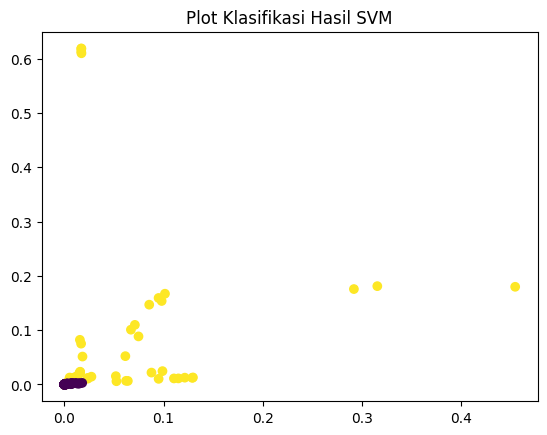

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

def extract_histogram_features(image, bins=256):
    hist = np.histogram(image.flatten(), bins=bins, range=[0, 256])[0]
    return hist / np.sum(hist)  # Normalize the histogram

def prepare_data(data):
    X = np.array([extract_histogram_features(img) for img, _ in data])
    y = np.array([label for _, label in data])
    # Encode labels
    le = LabelEncoder()
    y = le.fit_transform(y)
    return X, y, le

# Load and prepare the data
train_dir = "/content/drive/MyDrive/MachineLearning/Jobsheet4/images/training/"
test_dir = "/content/drive/MyDrive/MachineLearning/Jobsheet4/images/test/"


train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)

X_train, y_train, le = prepare_data(train_data)
X_test, y_test, _ = prepare_data(test_data)

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=50)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Plot Klasifikasi Hasil SVM")
plt.show()